# P9 Produisez une étude de marché avec R ou Python

# Importation de librairies

In [258]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [259]:
# On cherche à afficher seulement deux décimales pour les nombres dans votre dataframe
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [260]:
tableau= pd.read_csv("Tableau.csv")

# CREATION DU DENDROGRAMME

In [261]:
tableau.head()

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability
0,Afghanistan,36296113.00,12968964.14,55533.05,520.62,-2.80
1,Afrique du Sud,57009756.00,31721368.43,2034678.19,6121.88,-0.28
2,Albanie,2884169.00,3635466.18,47185.00,4514.20,0.38
3,Algérie,41389189.00,33057959.15,264063.03,4109.70,-0.92
4,Allemagne,82658409.00,77966717.71,1609359.22,44651.83,0.59


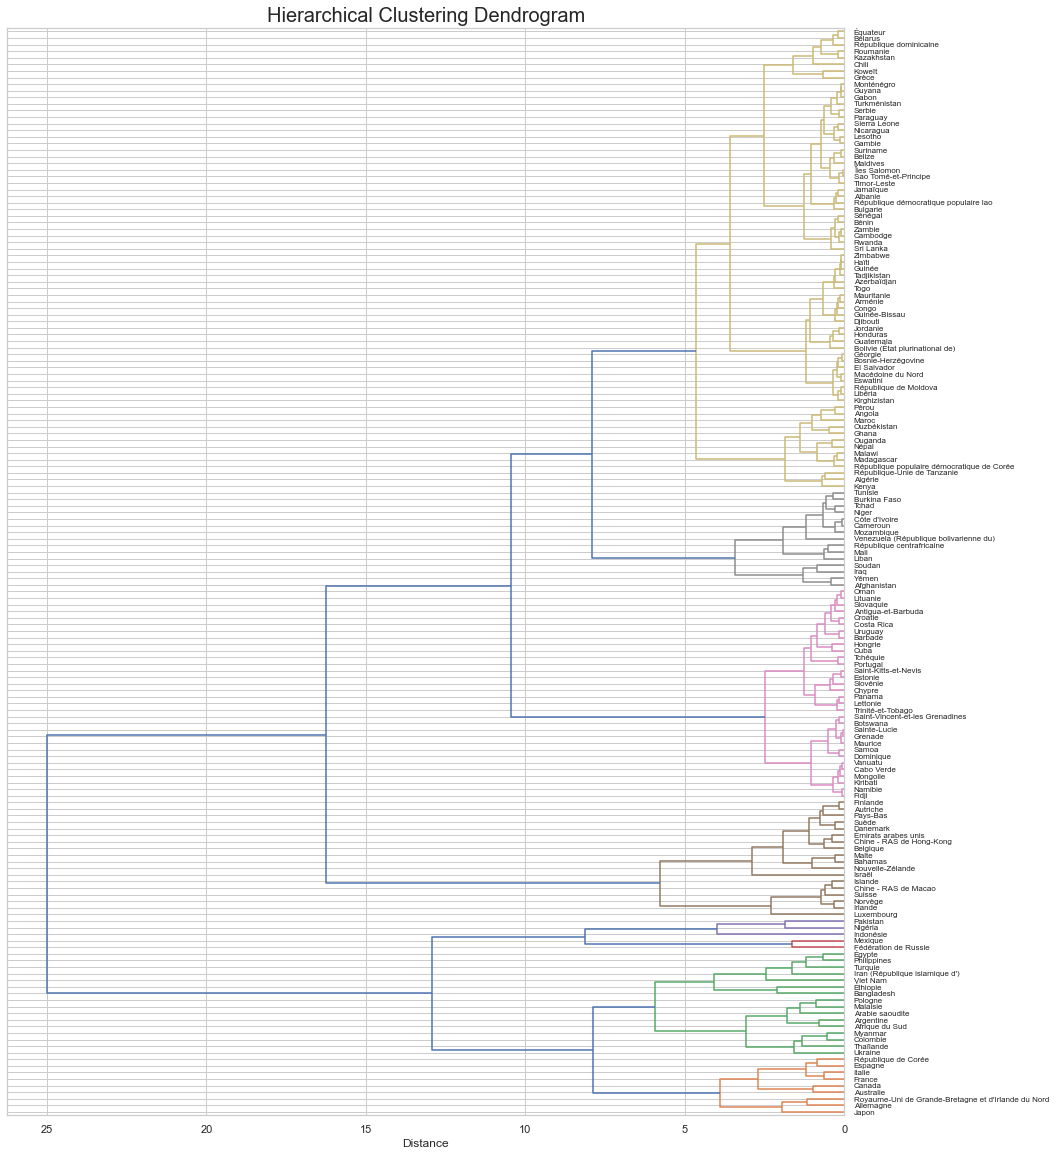

In [151]:
# Mise en index de "Zone"
tableau.set_index("Zone",inplace=True)

# enregistrement des valeurs dans une variable X
X= tableau.values

# Normalisation des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul de Z avec les données normalisé et la méthode de Ward
Z = linkage(X_scaled, method="ward")

#Affichage d'un troisième dendrogramme ( par curiosité)
fig =plt.figure(figsize=(15,20))
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Distance')

dendrogram(Z, labels = tableau.index, leaf_font_size=8, color_threshold=7, orientation='left')

plt.show()

On affiche une version tronquée de notre dendrogramme. On ne veut garder que les 8 clusters que l'on a trouvé

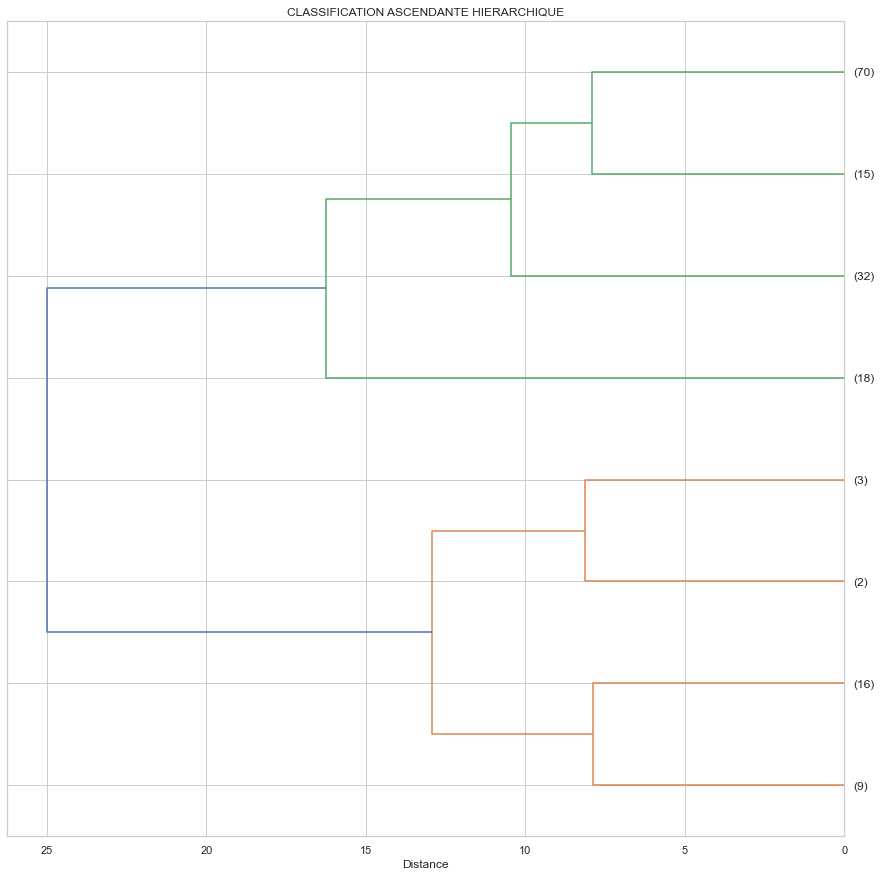

In [152]:
fig =plt.figure(figsize=(15,15))
dendrogram(Z, labels = tableau.index, p=8, truncate_mode='lastp', leaf_font_size=12, orientation='left')

plt.title('CLASSIFICATION ASCENDANTE HIERARCHIQUE')
plt.xlabel('Distance')
plt.show()

La fonction fcluster est utilisée pour affecter chaque observation à un groupe, en fonction de la classification obtenue par la CAH. Ici, on spécifie 8 comme nombre de groupes à obtenir.

In [153]:
#Identification des 8 groupes obtenus
groupes_cah = fcluster(Z, 8, criterion='maxclust')

#print('Numérotation de nos groupes : ' + str(np.unique(groupes_cah)))

On vérifie :

In [154]:
groupes_cah

array([7, 2, 8, 8, 1, 8, 6, 2, 2, 8, 1, 5, 8, 5, 2, 6, 5, 8, 8, 8, 6, 8,
       7, 8, 8, 6, 8, 7, 1, 8, 5, 5, 6, 2, 8, 6, 6, 6, 7, 5, 8, 6, 8, 1,
       6, 8, 6, 5, 1, 3, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 6, 4, 2, 7,
       5, 5, 5, 1, 8, 1, 8, 8, 8, 8, 6, 8, 8, 6, 7, 8, 6, 5, 8, 8, 2, 8,
       8, 7, 5, 8, 6, 8, 3, 6, 8, 7, 2, 6, 8, 7, 4, 5, 5, 8, 6, 8, 8, 4,
       6, 8, 5, 2, 2, 6, 8, 8, 1, 8, 7, 1, 8, 8, 8, 8, 8, 6, 6, 6, 6, 8,
       8, 8, 6, 6, 7, 8, 5, 8, 5, 8, 8, 7, 6, 2, 8, 8, 6, 7, 8, 2, 2, 6,
       6, 7, 2, 7, 8, 8, 2, 5, 8, 2, 8], dtype=int32)

A chaque observation a été attribué un groupe, on a normalement 165 observation ( équivalente à 165 lignes / Pays ). On vérifie cette affirmation.

In [155]:
groupes_cah.size

165

Parfait ! Nous utiliserons pour la prochaine étape, la fonction np.argsort() qui permet de trier un tableau selon l'ordre croissant des valeurs et de renvoyer les index triés

In [156]:
idg = np.argsort(groupes_cah)
idg

array([ 28, 121,  48,  43,  69,  71,  10, 118,   4,  86,  33,   7, 114,
       160, 145,  64, 151, 152,   8, 163, 156,   1, 113,  14,  98,  49,
        94, 102, 109,  63,  90, 112,  47,  66,  67,  68, 161,  39, 104,
       138,  31,  30, 140, 103,  11,  13,  16,  83,  92, 110,  95, 106,
        79,  99,  76,  62,  82,  44,  36,  15,  20, 148,  25,   6, 144,
       115,  32,  35, 153, 154, 135,  41, 134, 130,  46, 129, 128, 127,
        53,  37, 157, 155, 120, 143, 149, 101, 136,  97,  89,   0,  65,
        27,  22,  80,  38,  26, 142, 141,  29, 139,  87,  24,  40,  42,
       133, 132, 131,  45,  34, 137, 146, 147, 162,   2,   3, 159, 158,
         5,  50,   9,  17,  18,  19,  21, 150,  23,  12,  51,  52, 126,
       105,  72,  73,  74,  75, 100,  70,  77,  96,  81,  84,  93,  85,
        91,  78, 107, 108,  61, 125, 124, 123, 122,  54,  55, 119,  56,
       117, 116,  57,  58,  59,  60, 111,  88, 164], dtype=int64)

Si on prend le premier élément du tableau, c'est-à-dire "28", cela signifie que le pays ayant l'index 28 dans la liste initiale (avant tri) est dans le groupe ayant le numéro le plus petit.

De même, si on prend le dernier élément du tableau, c'est-à-dire "164", cela signifie que le pays ayant l'index 164 dans la liste initiale est dans le groupe ayant le numéro le plus grand.

On va créer un df **df_groupes_cah** à deux colonnes : 
- Groupe (numéro de cluster)
- la liste ordonnée des pays en fonction de leurs clusters. 

Cela permet de voir facilement quels pays sont regroupés dans chaque cluster.

In [157]:
df_groupes_cah = pd.DataFrame(tableau.index[idg], groupes_cah[idg]).reset_index()

En somme :
- tableau.index[idg] permet d'obtenir le nom des pays trié selon les groupes obtenus.
- groupes_cah[idg] permet d'obtenir les groupes correspondants triés par ordre croissant des pays.
- reset_index() permet de réinitialiser l'index du DataFrame et de créer une colonne 'index' contenant l'ancien index.

Ainsi, df_groupes_cah contient une liste triée de tous les pays selon leurs groupes obtenus à partir de la CAH.

In [158]:
df_groupes_cah

,index,Zone
0,1,Canada
1,1,République de Corée
2,1,France
3,1,Espagne
4,1,Italie
...,...,...
160,8,Géorgie
161,8,Haïti
162,8,Paraguay
163,8,Maldives


On change le nom de la colonne index pour "Groupe"

In [159]:
df_groupes_cah = df_groupes_cah.rename(columns={'index':'Groupe'})

On vérifie:

In [160]:
df_groupes_cah.head()

,Groupe,Zone
0,1,Canada
1,1,République de Corée
2,1,France
3,1,Espagne
4,1,Italie


On joint maintenant les df tableau et df_groupes_cah

In [161]:
df_groupes_cah_2 = pd.merge(tableau, df_groupes_cah, on='Zone')

On vérifie la jointure 

In [162]:
df_groupes_cah_2.head()

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability,Groupe
0,Afghanistan,36296113.00,12968964.14,55533.05,520.62,-2.80,7
1,Afrique du Sud,57009756.00,31721368.43,2034678.19,6121.88,-0.28,2
2,Albanie,2884169.00,3635466.18,47185.00,4514.20,0.38,8
3,Algérie,41389189.00,33057959.15,264063.03,4109.70,-0.92,8
4,Allemagne,82658409.00,77966717.71,1609359.22,44651.83,0.59,1


Parfait!

Maintenant on peut calculer la moyenne de chaque variable pour chaque groupe défini dans le DataFrame df_groupes_cah_2. Grace à l'addition des méthodes .groupby() et .mean().

In [163]:
df_groupes_cah_2.groupby('Groupe').mean()

<ipython-input-163-9ad9631e95dc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupes_cah_2.groupby('Groupe').mean()


,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability
Groupe,,,,,
1,62385040.33,52359963.49,1511724.07,39697.89,0.58
2,71449226.69,45856385.54,1300418.50,6817.52,-0.78
3,135153703.00,111001970.05,4283140.26,10052.42,-0.68
4,221143472.00,122655229.23,1104650.93,2420.75,-1.64
5,6056829.39,5470846.43,168595.71,57333.28,0.96
6,2857734.69,2298464.17,65069.28,12830.67,0.80
7,23115052.87,11487672.69,143984.44,2413.24,-1.63
8,12376425.80,7892283.64,127013.79,4204.93,-0.22


Parfait !  Créons maintenant des boîtes à moustaches afin de voir comment se répartissent les différentess valeurs au sein de chaque groupe, et de mieux comprendre les caractéristiques de chaque cluster.

In [164]:
import seaborn as sns

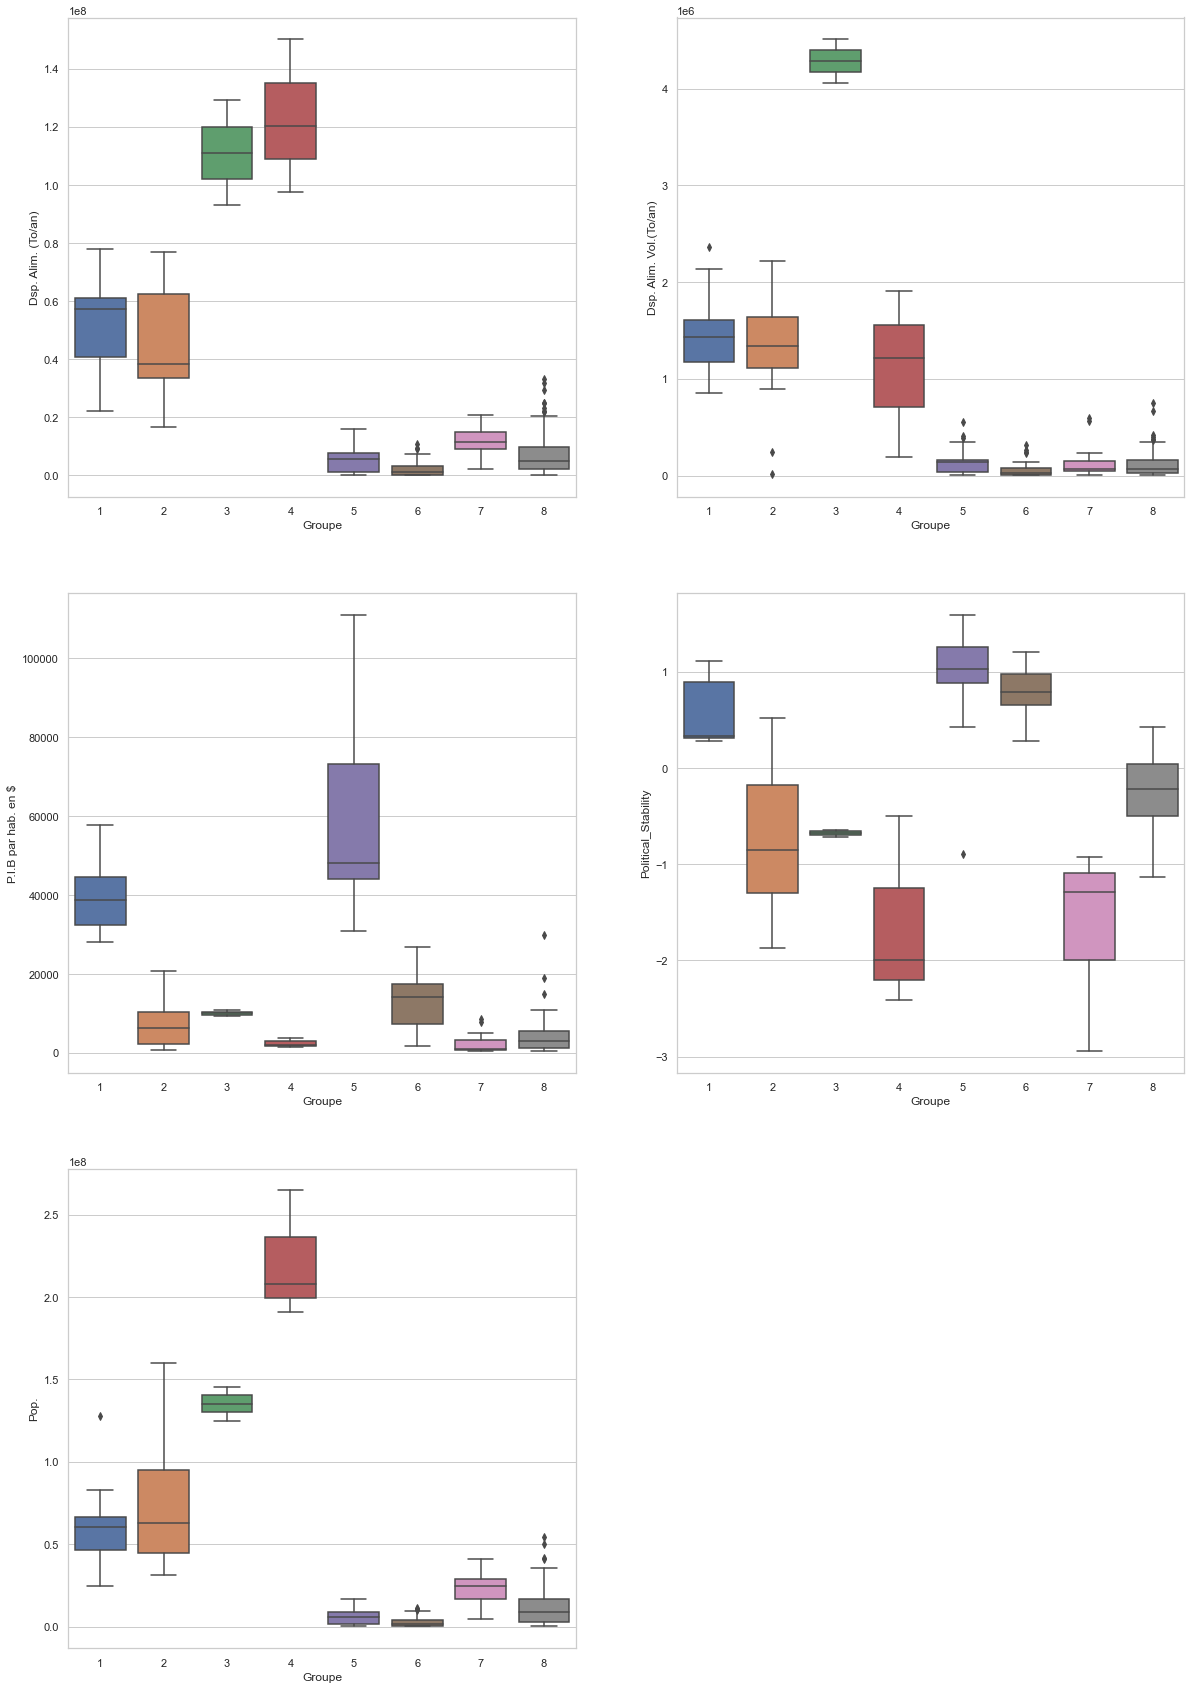

In [165]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20,30))
sns.set(style="whitegrid")

plt.subplot(321)
sns.boxplot(data=df_groupes_cah_2, x='Groupe', y='Dsp. Alim. (To/an)')

plt.subplot(322)
sns.boxplot(data=df_groupes_cah_2, x='Groupe', y='Dsp. Alim. Vol.(To/an)')

plt.subplot(323)
sns.boxplot(data=df_groupes_cah_2, x='Groupe', y='P.I.B par hab. en $')

plt.subplot(324)
sns.boxplot(data=df_groupes_cah_2, x='Groupe', y='Political_Stability')

plt.subplot(325)
sns.boxplot(data=df_groupes_cah_2, x='Groupe', y='Pop.')

plt.show()

On a des groupes intéressant, le groupe de pays 1 semble être le plus intéressant et le plus raisonnable avec :
- un marche de la viande volailles supérieur à 1,5 million de To disponible pour la moitié des pays le composant 
- une des meilleure stabilité politique 
- une population d'en supérieure à 60 millions d'habitant par pays ( Comme la france ) pour la moitié des pays le composant 
- un PIB par habitant supérieur à 40 K usd  pour la moitié des pays le composant 

Le groupe 3 aussi pourrait être interessant car le volume de VIANDE DE VOLLAILLE disponible sur l'année 2017 ést de plus de 4 millions de To. malheureusement la stabilité politique est l'une de plus basse même chose pour le pib par habitant. Ce desavantage est rattrapé par la population qui est globalement plus élevé que pour les autres pays. 

Le groupe 5 est celui composé des pays ayant le plus fort pib par habitant, les pays sont riches il n'y aura pas de problème pour acheter nos produits malheureusement, on a un des marché de la viande de volailles les plus petit avec 250 KTo par année.

Le groupe numéro 2 a une situation similaire au groupe 1 mais a une population plus grande, une stabilité plus basse et un des pib par habitant des plus bas.

Le but ici n'est pas simplement d'analyser les groupes de pays mais d'en choisir. En choisissant des pays on renonce aussi à s'installer dans d'autres . 

Je préconise les pays du groupe 1 pour les raisons que j'ai citées

In [166]:
df_groupes_cah_2.loc[df_groupes_cah_2['Groupe'] == 1, 'Zone']


4                                              Allemagne
10                                             Australie
28                                                Canada
43                                               Espagne
48                                                France
69                                                Italie
71                                                 Japon
118    Royaume-Uni de Grande-Bretagne et d'Irlande du...
121                                  République de Corée
Name: Zone, dtype: object

Mis à part pour la république de Corée les pays sont globalement plutot proche de la france ce qui en fait un autre avantage.

# Utilisation de l'algorithme KMeans

_K-means est un algorithme de clustering non supervisé couramment utilisé en apprentissage automatique pour trouver des groupes de données similaires sans étiquettes prédéfinies._

_Le but de l'algorithme est de diviser un ensemble de données en k groupes (ou clusters) en minimisant la distance intra-cluster._

Imaginons qu'on divise notre ensemble de pays en 3 groupes. Si ces trois groupes sont assez ressérés (c'est à dire : si la vraiance intraclasse est assez faible) on pourra se contenter de n'étudier que les groupes au lieu des individus.

Toute le problème réside dans le fait de créer un clustering de qualité, afin de minimiser la variance intracluster, mais aussi de maximiser la variance intercluster.  
Afin de choisir le meilleur nombre de cluster ( qui doit être défini en amont contrairement à la CAH )nous pouvons commencer par calculer les inerties

Pour choisir le nombre optimal de clusters, on lance souvent le k-means plusieurs fois, avec différentes valeurs de K
 . Pour chacune d'entre elles, on note l’inertie intraclasse obtenue.

Plus il y a de clusters, plus le nombre d'individus par cluster diminue, et plus les clusters sont resserrés. Donc, bien entendu, l’inertie intraclasse diminue forcément quand K augmente !

**Mais on doit trouver un juste milieu, le but n'est pas d'avoir l'inertie intraclasse la plus faible sinon on se retrouverait avec 165 clusters d'un point.** 

Pour déterminer le nombre de clusters à étudier, on s'intéresse au graphique qui trace l'inertie intraclasse en fonction du nombre de clusters. On cherche plus particulièrement une "cassure" dans la courbe. Cette "cassure" nous indique à partir de quel nombre de clusters nous "allons trop loin".

In [167]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import cluster, metrics
from sklearn import decomposition

# Inerties et méthode du "coude".

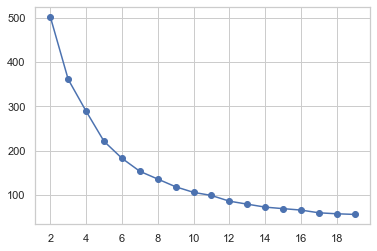

In [168]:
#On crée une liste dans laquelle on stocke les inerties
inerties=[]

#On fait une boucle de 2 à 20 pour tester toutes ces possibiliéts
for k in range(2, 20):
    #pour chaque k, on crée un modèle et on l’ajuste
    km = cluster.KMeans(n_clusters=k)
    km.fit(X_scaled)
    #on stocke l’inertie associée dans la liste inerties tout en haut 
    inerties.append(km.inertia_)

#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(2, 20), inerties, marker='o')
plt.xticks(range(2, 20, 2))
plt.show()

Même en relançant plusieurs fois notre graphique, on se rend compte que la "cassure" apparait à K=6. En effet le coefficient directeur apparait moins élevé (valeur absolue) à partir de 6 ou 8 la courbe s'applatie. Une solution à 6 ou 8 clusters peut être considérée.
Deux indicateurs valent peut-être mieux qu'un. Passons au score de Davies-Bouldin

# SCORE DE DAVIES BOULDIN 

L'indice de Davies Bouldin, permet de mesurer la qualité d'un clustering, tant sur le plan de l'homogénéité des clusters que sur les plan de leurs séparation des autres clusters. 
On cherche le ratio entre le "Tightness" / resserement d'un cluster ( moyenne de la distance des points au centroide) que l'on veut faible et la distance des centroides que l'on veut grand. 
L'indice de Davies Bouldin c'est l'opération : Homogéneité sur la distance des centroides . En gros on veut pour cette fraction un numérateur petit et un grand dénominateur. Donc plus le score est petit mieux c'est.

Text(0.5, 1.0, 'Détermination graphique du nombre de classes optimales pour le K-mean par le score de Davies Bouldin')

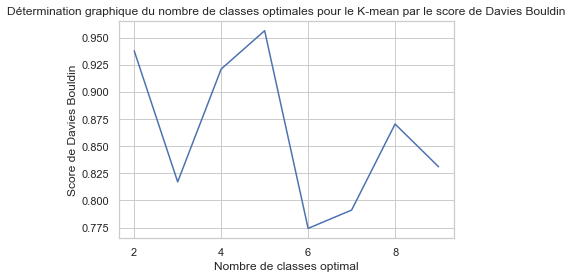

In [169]:
#Determination du nombre optimum de clusters pour le K-means: Score de Davies Bouldin:

# Création de la methode:
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
# Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,10))

for center in centers:
    scores.append(get_kmeans_score(X_scaled, center))

#Graphique:
plt.plot(centers, scores)
plt.xticks(range(2, 10, 2))
plt.xlabel("Nombre de classes optimal")
plt.ylabel("Score de Davies Bouldin")
plt.title("Détermination graphique du nombre de classes optimales pour le K-mean par le score de Davies Bouldin")

Cette fonction nous permet de déterminer graphiquement le nombre optimal de clusters pour un modèle K-means en utilisant le score de Davies Bouldin. 

La méthode **get_kmeans_score** prend en entrée le jeu de données data et le nombre de centres center que l'on souhaite. Elle retourne le score de Davies Bouldin pour le modèle K-means correspondant.

Ensuite, une liste vide scores est créée pour stocker les scores de Davies Bouldin pour chaque nombre de centres testé. La boucle for permet de tester des nombres de centres allant de 2 à 9, en utilisant la méthode get_kmeans_score pour chaque nombre de centres et en stockant le résultat dans la liste scores.

Finalement, le graphique est créé en traçant le score de Davies Bouldin en fonction du nombre de centres testé. Le nombre de centres est indiqué sur l'axe horizontal, et le score de Davies Bouldin sur l'axe vertical. Le nombre de centres optimal est celui correspondant au point où le score de Davies Bouldin est le plus bas. Ici, même en rejouant plusieurs fois notre fonction on remarque qu'une solution à 6 clusters présente un score minimal.

Il semblerait que le nombre optimal de cluster soit bien de 6. Un clustering avec k=8 est en troisième position. Etant donné qu'on me demande une comparasaison des deux méthode de clustering que sont le Kmeans et la CAH, nous ferons aussi un clustering ou k est égal à 8 afin de pouvoir efficacement comparer.

NB: Les scores sont tout de même élevés ( pour 6 ou 8 donc finalement cela ne change pas grand choses), il y a donc des chances que les clusters se chevauchent, on aurait pu essayer avec un plus grand nombre de cluster mais la clusterisation a pour but d'essayer d'étudier un petit nombre d'"individus". Etudier 20 clusters est certes plus faciles qu'étudier 165 pays mais cela reste tout de même bien plus laborieux que 6 ou 8 clusters.

# Clusterings

On va tout d'abord faire un clustering avec 6 clusters

In [200]:
cls6=cluster.KMeans(n_clusters=6)
cls6.fit(X_scaled)

KMeans(n_clusters=6)

Etant donné qu'on nous demande d'analyser les centroides ( c'est à dire le centre de gravité de nos clusters: c'est un point qui n'existe pas vraiment ) de nos classes nous allons enregistrer nos centroides de clusters dans une variables centroids6

In [201]:
centroids6 = cls6.cluster_centers_
centroids6

array([[-0.47466057, -0.47996812, -0.41119437, -0.26605486,  0.45043101],
       [ 4.5506984 ,  3.71661994,  0.74311348, -0.59864445, -1.63542803],
       [-0.44177009, -0.39187882, -0.25614714,  2.30371278,  1.24391205],
       [-0.03656942, -0.13587358, -0.30962226, -0.54944725, -1.0238797 ],
       [ 1.02094331,  1.28018285,  1.66800925,  0.28521319, -0.10455787],
       [ 2.77721253,  3.70770966,  5.69128986, -0.19124436, -0.68036437]])

Il sont présentés dans un array numpy. On va les changer en df grace à la méthode .DataFrame()

In [202]:
pd.DataFrame(centroids6, columns=tableau.columns)

,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability
0,-0.47,-0.48,-0.41,-0.27,0.45
1,4.55,3.72,0.74,-0.60,-1.64
2,-0.44,-0.39,-0.26,2.30,1.24
3,-0.04,-0.14,-0.31,-0.55,-1.02
4,1.02,1.28,1.67,0.29,-0.10
5,2.78,3.71,5.69,-0.19,-0.68


Les colonnes du DataFrame sont les noms des variables de notre jeu de données. Problèmes ces données sont normalisées. On va utiliser la méthode inverse() de l'objet StandardScaler qui permet de faire l'opération inverse de la standardisation, c'est-à-dire de revenir aux données d'origine avant la standardisation.

Elle applique la formule suivante : 

_**X_original = (X_scaled * std) + mean**_

Sachant que la formule pour standardiser une variable est la suivante : 

_**X_scaled = (X - mean) / std**_


On enregistre nos données standardisées dans une variable

In [203]:
centroids6_scaled = pd.DataFrame(centroids6, columns=tableau.columns)

On crée un objet StandardScaler et l'ajuster aux données d'origine

In [204]:
scaler = StandardScaler().fit(X)

On déscale les centroides que l'on enregistre dans une variable

In [205]:
centroids6_descaled = scaler.inverse_transform(centroids6_scaled)

On crée un dataframe avec les centroides déscalés

In [206]:
centroids6_descaled_df = pd.DataFrame(centroids6_descaled, columns=centroids6_scaled.columns)

On vérifie le tout.

In [207]:
centroids6_descaled_df

,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability
0,5654857.85,4055844.59,96440.15,8610.51,0.34
1,205778960.00,111229523.38,888370.23,2200.12,-1.54
2,6964650.06,6305494.51,202812.61,58140.66,1.06
3,23100894.47,12843430.25,166125.21,3148.36,-0.99
4,65214062.52,49007088.65,1522908.73,19235.75,-0.16
5,135153703.00,111001970.05,4283140.26,10052.42,-0.68


Un image vaut mieux que mille mots :

On peut maintenant faire des diagramme en baton afin de visualiser nos centroides ce sera plus facile que de lire nos données brutes 

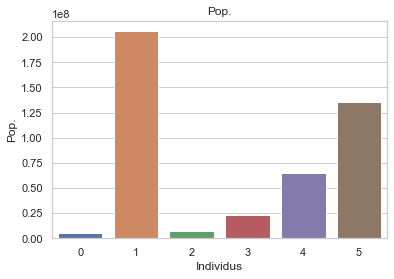

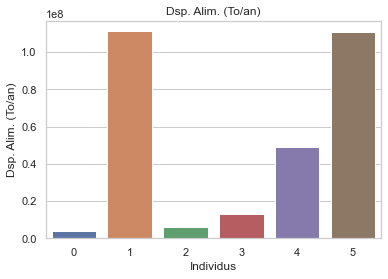

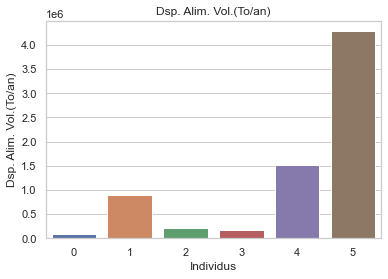

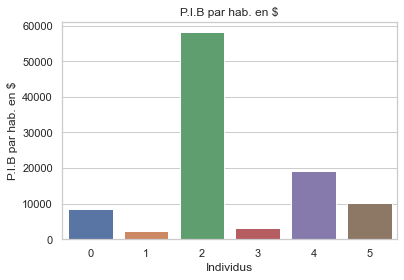

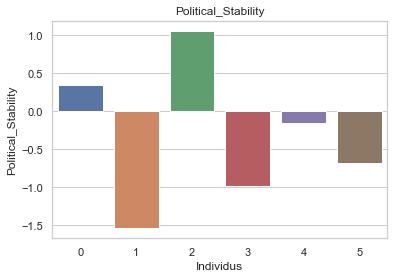

In [208]:
import seaborn as sns

# Obtenir les noms des colonnes
cols = centroids6_descaled_df.columns

# Boucle pour tracer un histogramme pour chaque colonne
for col in cols:
    # Créer une figure
    fig, ax = plt.subplots()
    # Tracer un histogramme en barres pour la colonne
    sns.barplot(x=centroids6_descaled_df.index, y=col, data=centroids6_descaled_df, ax=ax)
    # Titre de la figure
    ax.set_title(col)
    # Nom de l'axe des x
    ax.set_xlabel("Individus")
    # Nom de l'axe des y
    ax.set_ylabel(col)
    # Afficher la figure
    plt.show()


On peut voir qu'étudier un clustering ou K=6 ne donne pas des groupes satisfaisant, ils ont tous un defaut, quand la consommation de viande de volaille et grande la stabilité politique est basse comme pour le groupe 5 qui a aussi un PIB par habitant inférieur à 10K usd

# Clustering avec k = 8

On va faire exactment la même chose que nous avons faire pour le clustering k=6

In [209]:
cls8=cluster.KMeans(n_clusters=8)
cls8.fit(X_scaled)

KMeans()

In [210]:
centroids8 = cls8.cluster_centers_
centroids8

array([[-0.53388539, -0.5369202 , -0.4306973 , -0.01868442,  0.87906655],
       [ 4.5506984 ,  3.71661994,  0.74311348, -0.59864445, -1.63542803],
       [ 1.19039121,  1.29799301,  1.68148279, -0.3728665 , -0.86750148],
       [ 0.23887452,  0.05177818, -0.28113052, -0.59181681, -1.69110163],
       [ 0.93714829,  1.38866129,  1.69874371,  0.98986576,  0.62738078],
       [-0.4211952 , -0.36249804, -0.22178029,  2.47575327,  1.23529956],
       [-0.32349892, -0.34791801, -0.3420293 , -0.4935346 , -0.23536007],
       [ 2.77721253,  3.70770966,  5.69128986, -0.19124436, -0.68036437]])

In [211]:
pd.DataFrame(centroids8, columns=tableau.columns)

,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability
0,-0.53,-0.54,-0.43,-0.02,0.88
1,4.55,3.72,0.74,-0.60,-1.64
2,1.19,1.30,1.68,-0.37,-0.87
3,0.24,0.05,-0.28,-0.59,-1.69
4,0.94,1.39,1.70,0.99,0.63
5,-0.42,-0.36,-0.22,2.48,1.24
6,-0.32,-0.35,-0.34,-0.49,-0.24
7,2.78,3.71,5.69,-0.19,-0.68


In [212]:
# Créer un dataframe avec les centroides scalés
centroids_scaled_8 = pd.DataFrame(centroids8, columns=tableau.columns)

# Créer un objet StandardScaler et l'ajuster aux données d'origine
scaler = StandardScaler().fit(X)

# Déscaler les centroides
centroids_descaled_8 = scaler.inverse_transform(centroids_scaled_8)

# Créer un dataframe avec les centroides déscalés
centroids_descaled_df_8 = pd.DataFrame(centroids_descaled_8, columns=tableau.columns)

# Afficher les centroides déscalés
centroids_descaled_df_8


,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability
0,3296356.93,2601385.77,83059.88,13378.37,0.73
1,205778960.00,111229523.38,888370.23,2200.12,-1.54
2,71961960.40,49461929.79,1532152.46,6551.81,-0.85
3,34069856.61,17635735.32,185672.39,2331.72,-1.59
4,61877106.30,51777442.42,1543994.56,32817.34,0.50
5,7784000.81,7055829.47,226390.50,61456.59,1.05
6,11674544.86,7428178.48,143891.87,4226.03,-0.28
7,135153703.00,111001970.05,4283140.26,10052.42,-0.68


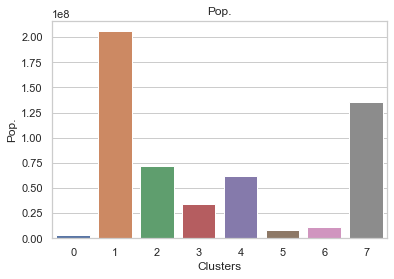

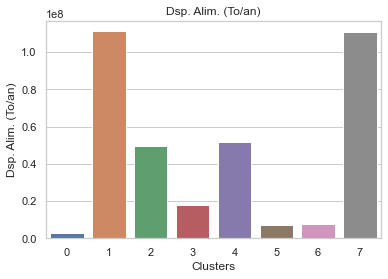

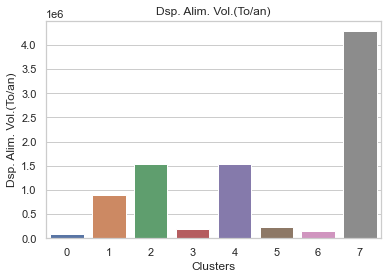

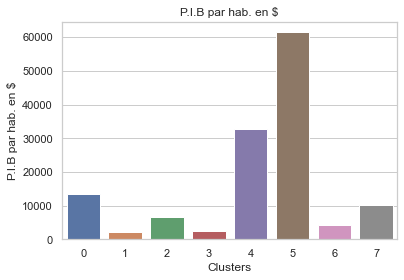

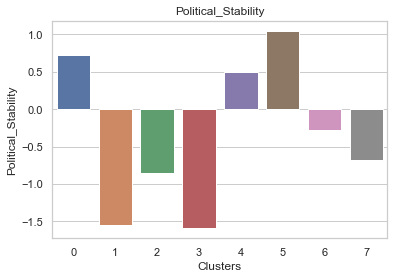

In [213]:
import seaborn as sns

# Obtenir les noms des colonnes
cols = centroids_descaled_df_8.columns

# Boucle pour tracer un histogramme pour chaque colonne
for col in cols:
    # Créer une figure
    fig, ax = plt.subplots()
    # Tracer un histogramme en barres pour la colonne
    sns.barplot(x=centroids_descaled_df_8.index, y=col, data=centroids_descaled_df_8, ax=ax)
    # Titre de la figure
    ax.set_title(col)
    # Nom de l'axe des x
    ax.set_xlabel("Clusters")
    # Nom de l'axe des y
    ax.set_ylabel(col)
    # Afficher la figure
    plt.show()


Le groupe 4 se détache et semble avoir les même caractéristique que le groupe 1 de notre CAH .
Afin d'attribuer les clusters à chacun de nos pays on va procéder de la même façon qu'on l'a déjà fait avec le clustering par CAH

In [215]:
# # Obtenir les noms des colonnes
# cols = centroids_descaled_df.columns

# # Boucle pour tracer un histogramme pour chaque colonne
# for col in cols:
#     # Créer une figure
#     fig, ax = plt.subplots()
#     # Tracer un histogramme en barres pour la colonne
#     ax.bar(centroids_descaled_df.index, centroids_descaled_df[col])
#     # Titre de la figure
#     ax.set_title(col)
#     # Nom de l'axe des x
#     ax.set_xlabel("Individus")
#     # Nom de l'axe des y
#     ax.set_ylabel(col)
#     # Afficher la figure
#     plt.show()

In [216]:
clusters_kmeans6 = cls6.labels_
clusters_kmeans8 = cls8.labels_

En utilisant la méthode labels_ des objets KMeans (cls6 et cls8), on peut obtenir les étiquettes de cluster pour chaque observation, c'est-à-dire un tableau à une dimension où chaque valeur correspond au cluster assigné pour l'observation correspondante dans X_scaled.

In [217]:
clusters_kmeans6

array([3, 4, 0, 3, 4, 3, 0, 4, 4, 3, 2, 2, 3, 2, 1, 0, 2, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 3, 4, 0, 2, 2, 0, 4, 3, 0, 0, 0, 3, 2, 3, 0, 0, 4,
       0, 0, 0, 2, 4, 5, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 1, 4, 3,
       2, 2, 3, 4, 0, 4, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 2, 0, 3, 4, 3,
       0, 3, 2, 3, 0, 3, 5, 0, 0, 3, 4, 0, 0, 3, 1, 2, 2, 3, 0, 3, 3, 1,
       0, 0, 2, 4, 4, 0, 3, 0, 4, 0, 3, 4, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 3, 3, 0, 4, 0, 3, 0, 3, 0, 4, 3, 0,
       0, 3, 4, 3, 0, 3, 4, 2, 0, 3, 0])

A chaque observation a été attribué un groupe, on a normalement 165 observation ( équivalente à 165 lignes / Pays ). On vérifie cette affirmation.

In [218]:
clusters_kmeans6.size

165

Parfait ! Nous utilisons, la fonction np.argsort() qui permet de trier un tableau selon l'ordre croissant des valeurs et de renvoyer les index triésOn trie les Index selon leurs clusters

In [219]:
idk = np.argsort(cls6.labels_)
idk

array([ 82, 111, 110, 106, 100,  99,  96,  95,  92,  88,  84, 115,  81,
        78,  77,  76,  73,  70,  62,  59,  58,  54,  53,  79,  52, 117,
       122, 162, 158, 154, 153, 150, 148, 146, 144, 141, 139, 119, 137,
       134, 133, 132, 131, 130, 129, 128, 127, 124, 123, 135,  51, 164,
        26,  35,  15,  37,  17,  18,  41,  19,  20,  42,  32,   6,  36,
        21,  45,  25,  29,  24,   2,  44,  23,  50,  46, 109,  14,  63,
       102,  31,  30,  16,  90, 112, 104, 103,  83, 161,  47,  11, 138,
        39,  10, 140,  66,  67,  13,  12, 152, 159, 155, 157, 120,   3,
        22, 149, 147, 143, 125, 126, 142,   9, 136, 116,   5, 108,   0,
        75,  61,  72,  74,  60,  40,  38,  80, 163,  85,  87,  65,  91,
        89,  93,  27,  34, 105, 101, 107,  97,  56,  57,  55,  68, 156,
       160,  48,   1,   4,  64, 151, 113,  43,   7, 145,   8,  71, 114,
        86,  33,  98, 121,  28, 118,  69,  94,  49], dtype=int64)

Si on prend le premier élément du tableau, c'est-à-dire "82", cela signifie que le pays ayant l'index 82 dans la liste initiale (avant tri) est dans le groupe ayant le numéro le plus petit.

De même, si on prend le dernier élément du tableau, c'est-à-dire "49", cela signifie que le pays ayant l'index 49 dans la liste initiale est dans le groupe ayant le numéro le plus grand.

On va créer un df **df_cls6** à deux colonnes :

- Groupe (numéro de cluster)
- la liste ordonnée des pays en fonction de leurs clusters.
Cela permet de voir facilement quels pays sont regroupés dans chaque cluster.

In [220]:
df_cls6 = pd.DataFrame(tableau.index[idk], cls6.labels_[idk]).reset_index()

In [221]:
df_cls6

,index,Zone
0,0,Lituanie
1,0,Paraguay
2,0,Panama
3,0,Oman
4,0,Nicaragua
...,...,...
160,4,Canada
161,4,Royaume-Uni de Grande-Bretagne et d'Irlande du...
162,4,Italie
163,5,Mexique


On change le nom de la colonne index pour "cluster"

In [222]:
df_cls6= df_cls6.rename(columns={'index':'cluster'})

On vérifie:

In [223]:
df_cls6.head()

,cluster,Zone
0,0,Lituanie
1,0,Paraguay
2,0,Panama
3,0,Oman
4,0,Nicaragua


On joint maintenant les df tableau et df_groupes_cah

In [224]:
df_cls6 = pd.merge(tableau, df_cls6, on='Zone')

In [225]:
df_cls6.head()

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability,cluster
0,Afghanistan,36296113.00,12968964.14,55533.05,520.62,-2.80,3
1,Afrique du Sud,57009756.00,31721368.43,2034678.19,6121.88,-0.28,4
2,Albanie,2884169.00,3635466.18,47185.00,4514.20,0.38,0
3,Algérie,41389189.00,33057959.15,264063.03,4109.70,-0.92,3
4,Allemagne,82658409.00,77966717.71,1609359.22,44651.83,0.59,4


In [226]:
# #Parfait ! Nous utilisons, la fonction np.argsort() qui permet de trier un tableau 
# #selon l'ordre croissant des valeurs et de renvoyer les index triésOn trie les Index selon leurs clusters
# idk = np.argsort(cls6.labels_)

# #Affichage des observations selon leurs clusters
# df_cls6 = pd.DataFrame(tableau.index[idk], cls6.labels_[idk]).reset_index()
# df_cls6 = df_cls6.rename(columns={'index':'cluster'})

In [227]:
# # Jointure des deux df
# df_cls6 = pd.merge(tableau, df_cls6, on='Zone')
# df_cls6.head()

On fait la même chose en plus rapide pour le k-means ou k=8

In [228]:
# On trie les Index selon leurs clusters
idk = np.argsort(cls8.labels_)

#Affichage des observations selon leurs clusters
df_cls8 = pd.DataFrame(tableau.index[idk], cls8.labels_[idk]).reset_index()
df_cls8 = df_cls8.rename(columns={'index':'cluster'})

# Jointure des deux df
df_cls8 = pd.merge(tableau, df_cls8, on='Zone')
df_cls8.head()

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability,cluster
0,Afghanistan,36296113.00,12968964.14,55533.05,520.62,-2.80,3
1,Afrique du Sud,57009756.00,31721368.43,2034678.19,6121.88,-0.28,2
2,Albanie,2884169.00,3635466.18,47185.00,4514.20,0.38,0
3,Algérie,41389189.00,33057959.15,264063.03,4109.70,-0.92,3
4,Allemagne,82658409.00,77966717.71,1609359.22,44651.83,0.59,4


In [231]:
df_cls8.loc[df_cls8['cluster'] == 4, 'Zone']

4                                              Allemagne
8                                              Argentine
28                                                Canada
43                                               Espagne
48                                                France
69                                                Italie
71                                                 Japon
114                                              Pologne
118    Royaume-Uni de Grande-Bretagne et d'Irlande du...
121                                  République de Corée
Name: Zone, dtype: object

In [232]:
df_groupes_cah_2.loc[df_groupes_cah_2['Groupe'] == 1, 'Zone']

4                                              Allemagne
10                                             Australie
28                                                Canada
43                                               Espagne
48                                                France
69                                                Italie
71                                                 Japon
118    Royaume-Uni de Grande-Bretagne et d'Irlande du...
121                                  République de Corée
Name: Zone, dtype: object

# Repartition 

In [233]:
df_cls8.head()

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability,cluster
0,Afghanistan,36296113.00,12968964.14,55533.05,520.62,-2.80,3
1,Afrique du Sud,57009756.00,31721368.43,2034678.19,6121.88,-0.28,2
2,Albanie,2884169.00,3635466.18,47185.00,4514.20,0.38,0
3,Algérie,41389189.00,33057959.15,264063.03,4109.70,-0.92,3
4,Allemagne,82658409.00,77966717.71,1609359.22,44651.83,0.59,4


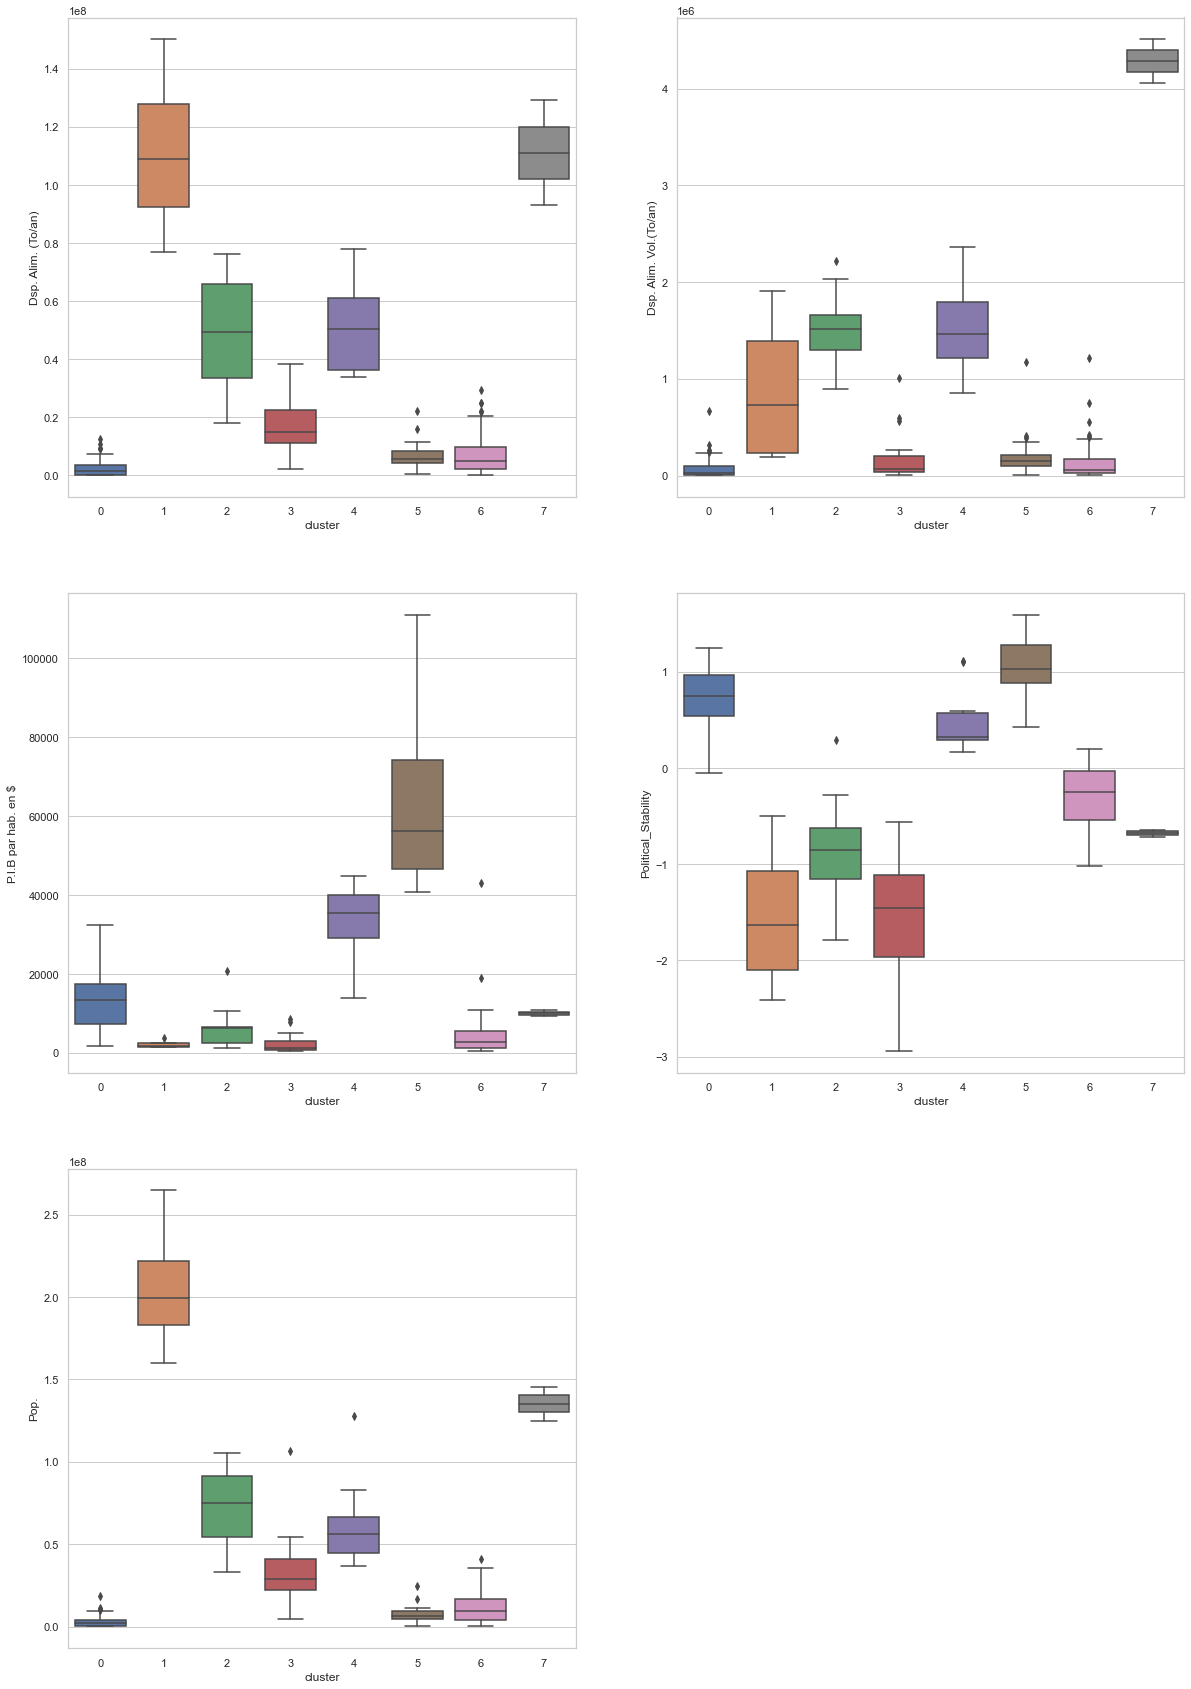

In [234]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20,30))
sns.set(style="whitegrid")

plt.subplot(321)
sns.boxplot(data=df_cls8, x='cluster', y='Dsp. Alim. (To/an)')

plt.subplot(322)
sns.boxplot(data=df_cls8, x='cluster', y='Dsp. Alim. Vol.(To/an)')

plt.subplot(323)
sns.boxplot(data=df_cls8, x='cluster', y='P.I.B par hab. en $')

plt.subplot(324)
sns.boxplot(data=df_cls8, x='cluster', y='Political_Stability')

plt.subplot(325)
sns.boxplot(data=df_cls8, x='cluster', y='Pop.')

plt.show()

In [235]:
pd.crosstab(df_cls8["cluster"], df_groupes_cah_2["Groupe"])

Groupe,1,2,3,4,5,6,7,8
cluster,,,,,,,,
0,0,0,0,0,2,32,0,7
1,0,1,0,3,0,0,0,0
2,0,10,0,0,0,0,0,0
3,0,2,0,0,0,0,13,3
4,8,2,0,0,0,0,0,0
5,1,0,0,0,15,0,0,0
6,0,1,0,0,1,0,2,60
7,0,0,2,0,0,0,0,0


En effectuant un crosstab, on voit que la clusterisation est presque la même quelque soit la méthode.

In [236]:
df_cls6.head()

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability,cluster
0,Afghanistan,36296113.00,12968964.14,55533.05,520.62,-2.80,3
1,Afrique du Sud,57009756.00,31721368.43,2034678.19,6121.88,-0.28,4
2,Albanie,2884169.00,3635466.18,47185.00,4514.20,0.38,0
3,Algérie,41389189.00,33057959.15,264063.03,4109.70,-0.92,3
4,Allemagne,82658409.00,77966717.71,1609359.22,44651.83,0.59,4


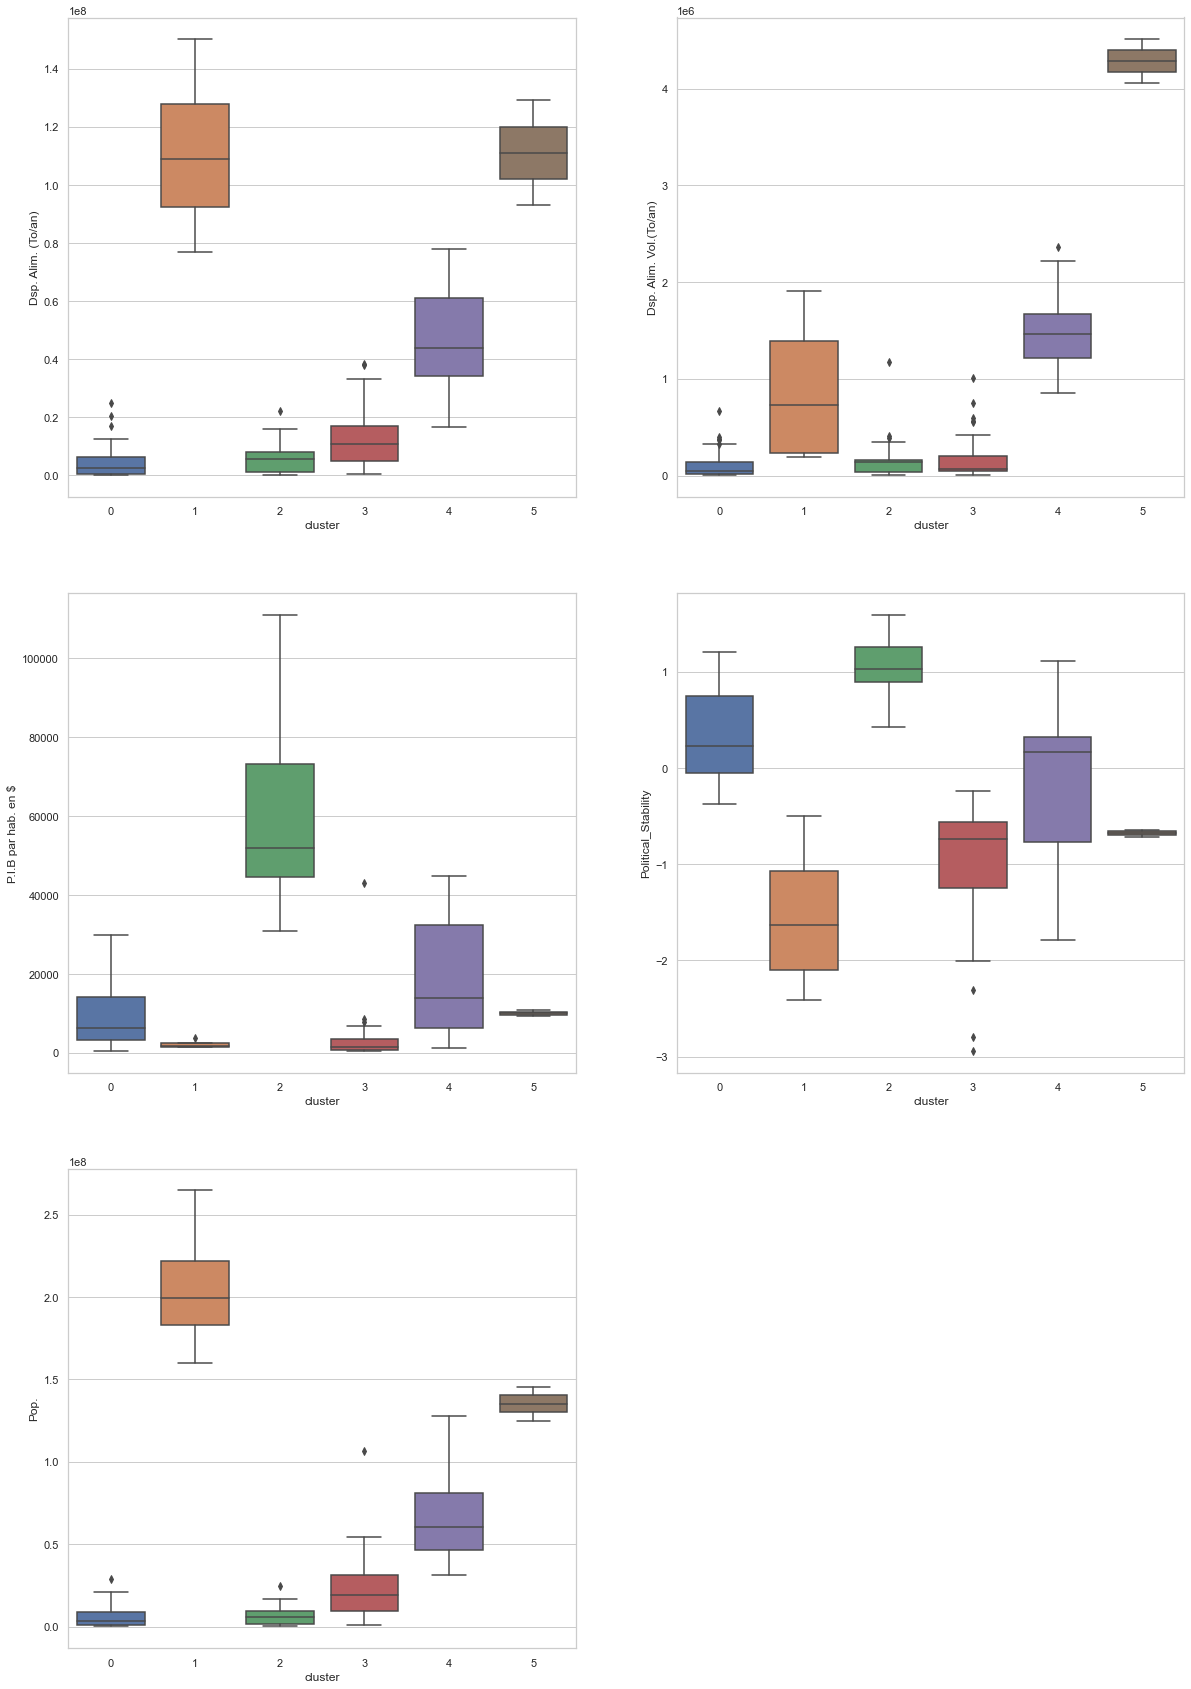

In [237]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20,30))
sns.set(style="whitegrid")

plt.subplot(322)
sns.boxplot(data=df_cls6, x='cluster', y='Dsp. Alim. Vol.(To/an)')

plt.subplot(321)
sns.boxplot(data=df_cls6, x='cluster', y='Dsp. Alim. (To/an)')

plt.subplot(323)
sns.boxplot(data=df_cls6, x='cluster', y='P.I.B par hab. en $')

plt.subplot(324)
sns.boxplot(data=df_cls6, x='cluster', y='Political_Stability')

plt.subplot(325)
sns.boxplot(data=df_cls6, x='cluster', y='Pop.')

plt.show()

# Visualisations des clusterings

# DATA SPLIT 

Pour nous faciliter la vie, plus tard, nous allons éclater les données présentes dE notre df tableau. Les valeurs ont été enregistrées dans une variable X, les valeurs standardisées, l'ont été dans une variable X_scaled,le nom des pays le sera dans une varibles names, et les noms des colonnes seront enregistrés dans une variable features.

In [238]:
# "le nom des pays le sera dans une varibles names"
names= tableau.index

On vérifie 

In [239]:
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe', 'Égypte', 'Émirats arabes unis', 'Équateur', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=165)

Parfait ! 

In [240]:
# "et les noms des colonnes seront enregistrés dans une variable features."
features = tableau.columns

On vérifie 

In [241]:
features

Index(['Pop.', 'Dsp. Alim. (To/an)', 'Dsp. Alim. Vol.(To/an)',
       'P.I.B par hab. en $', 'Political_Stability'],
      dtype='object')

On passe à l'ACP.

# Réalisation d'une Analyse en Composantes Principales

Le nombre maximal de composante qu'il est possible d'analyser est le minimum entre p ( nombre de variable / colonnes) et n ( nombre d'individus ) moins 1.
On a ici 165 individus et 5 variables . Le nombre maximal de composantes qu'il est possible d'analyser est donc 5 . On va utiliser le critère du coude afin de déterminer combien de composantes nous allons étudier .

Tout d'abord, il crée une instance de la classe PCA du module decomposition de la bibliothèque sklearn avec le paramètre n_components défini à 5. Cela signifie que l'on souhaite conserver 5 composantes principales lors de la réduction de dimensionnalité.

In [242]:
from sklearn import decomposition
pca= decomposition.PCA(n_components=5)

Ensuite, la méthode fit est appelée sur l'objet pca pour effectuer l'ACP sur les données X_scaled.

In [243]:
pca.fit(X_scaled)

print(pca.explained_variance_ratio_.cumsum())


[0.55340927 0.8491056  0.93133031 0.99498688 1.        ]


La méthode explained_variance_ratio_ retourne les pourcentages de variance expliquée par chaque composante. En prenant la somme cumulée de ces pourcentages avec la méthode cumsum(), on obtient les proportions de variance totale expliquée par les 5 premières composantes.
La bonne nouvelle est que 85 % de la variance est expliquée par les deux premières composantes principales !

In [244]:
X_trans=pca.transform(X_scaled)

Enfin, la méthode transform est appelée pour transformer les données initiales X_scaled en un tableau de dimension réduite X_trans, contenant les projections des observations sur les 5 premières composantes principales.

# Création du screeplot 

_Un Scree plot est un graphique qui permet de visualiser les valeurs propres (ou variances expliquées) de chaque composante principale obtenue lors d'une ACP ._

_Le Scree plot permet de déterminer le nombre optimal de composantes à retenir pour la représentation des données en fonction de la variance expliquée. La variance expliquée est la proportion de la variance totale des données qui est expliquée par chaque composante. Ainsi, plus une composante explique une grande proportion de la variance totale, plus elle est considérée comme importante._

_En général, on cherche à retenir le nombre minimal de composantes qui permet d'expliquer la plus grande partie de la variance totale. Le nombre de composantes à retenir est souvent choisi à partir de la courbe du Scree plot, en regardant la rupture nette qui apparaît. Le nombre de composantes à retenir est alors choisi comme étant celui avant la rupture nette, c'est-à-dire le nombre de composantes qui explique la majorité de la variance._

In [245]:
n_components = 5

In [246]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5]

On calcule la variance expliquée par chaque composante principale de l'ACP et on l'arrondit à deux décimales avec la méthode .round(). On l'enegistre dans la variable scree qui contient donc les pourcentages de variance expliquée pour chaque composante principale.

In [247]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([55.34, 29.57,  8.22,  6.37,  0.5 ])

In [248]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 55.,  85.,  93., 100., 100.])

La variable scree_cum donne la somme cumulée des pourcentages de variance expliquée pour chaque composante principale. La première composante explique 55% de la variance totale, les deux premières composantes expliquent 85% de la variance totale, les trois premières composantes expliquent 93% de la variance totale, les quatre premières composantes expliquent déjà approximativement 100% de la variance totale et toutes les cinq composantes expliquent 100% de la variance totale.

On crée une visualisation : un Eboulis des valeurs propres

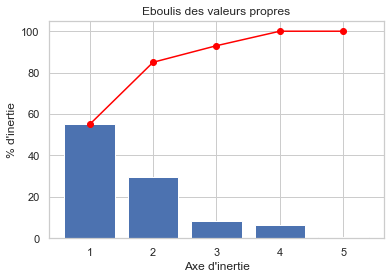

In [249]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Axe d'inertie")
plt.ylabel("% d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

Avec la méthode du coude on voit qu'on peut se contenter d'étudier les deux premières composantes principales. Et c'est vraiment cool parce que 85% de la variance total est concentrée dans les deux premières composantes principales ! Et qu'en plus pour faire une visualisation un plan sur 2 dimension c'est quand même vachement pratique. 

----

On s'occupe de représenter les deux clusters kmeans avec k=6 et k=8 sur le premiers plan factoriel. 

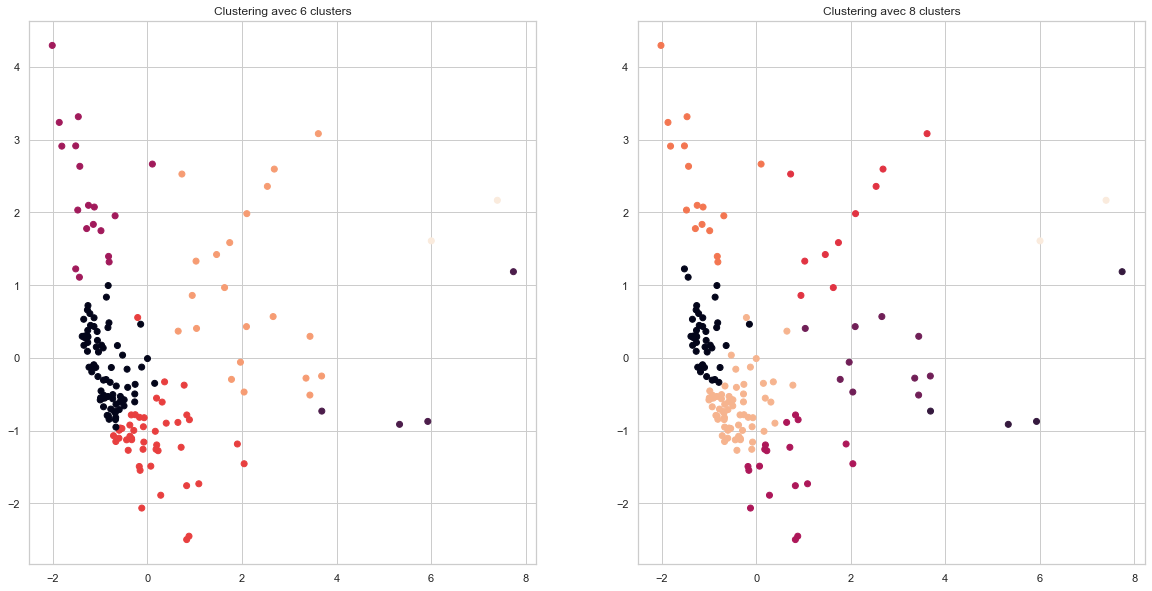

In [250]:
fig=plt.figure(figsize=(20,10))

ax = fig.add_subplot(121)
ax.scatter(X_trans[:,0],X_trans[:,1], c=cls6.labels_)
ax.set_title('Clustering avec 6 clusters')

ax = fig.add_subplot(122)
ax.scatter(X_trans[:,0],X_trans[:,1], c=cls8.labels_)
ax.set_title('Clustering avec 8 clusters')

plt.show()


On voit que la partition en 8 clusters est plus fine. Et, ce même si les clusters se chevauchent un peu .

# Etudier les liaisons entre les variables avec le cercle des corrélations.

Pour ce qui est de la création du cercle de corrélation rendez-vous en commentaire, on précise X=0 et y=1 pour le premier plan factoriel.

In [251]:
x, y = 0,1

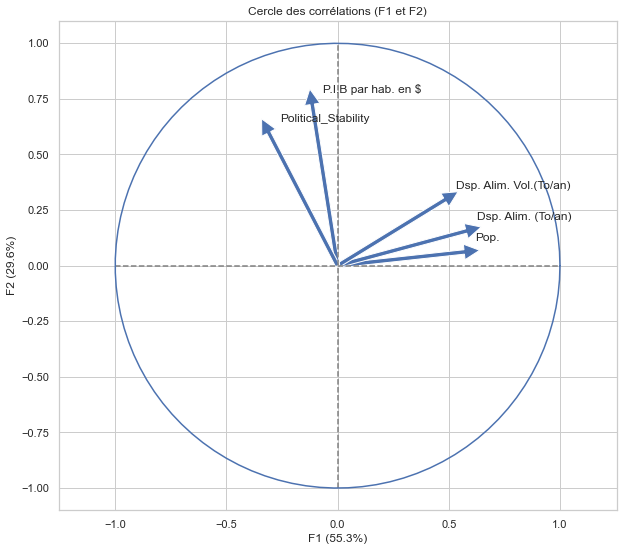

In [252]:
fig, ax = plt.subplots(figsize=(10, 9))
#crée une figure et un axe (ou plusieurs axes) pour tracer le cercle des corrélations,
#avec une taille de figure de 10 pouces de large et 9 pouces de hauteur."

for i in range(0, pca.components_.shape[1]):
    # parcourt chaque colonne de la matrice de composantes principales pca.components_.
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )
    #dessine une flèche à partir de l'origine (0,0) dans la direction des coordonnées 
    #de la composante principale pour la variable correspondante, avec une largeur de 
    #tête de 0.07, une longueur de tête de 0.07 et une largeur de ligne de 0.02.

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    #ajoute le nom de la variable correspondante à l'extrémité de la flèche, 
    #avec un décalage de 0.05 dans la direction x et y par rapport à la flèche.

    
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
 #trace une ligne horizontale de couleur grise pointillée à y=0 et une ligne 
 #verticale de couleur grise pointillée à x=0 pour représenter les axes.

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
#trace un cercle unité centré sur l'origine pour fournir une référence visuelle pour l'échelle.
plt.axis('equal')
#rend l'axe x et y de la même échelle pour avoir un cercle de corrélations parfaitement circulaire.
plt.show(block=False)

Les variables les plus corrélées à F1 et entre elles sont les variables :
- Dsp. Alim Vol.(To/an),
- Dsp. Alim Vol.(To/an)
- et Pop.  

Celles les plus coréllées à F2 et entre elles sont:
- Political_Stability 
- et P.I.B par hab. en $.  

L'axe F1 peut être interprété comme la quantité ou la taille, de façon générale. L'axe F2 peut etre lui interprété comme la qualité de vie ou la qualité d'un pays pour s'y installer.

# Etudier la variabilité des individus avec la représentation sur le premier plan factoriel.

Nous allons maintenant projeter nos individus ( les pays ) sur le premier plan factoriel. Grace à la méthode .transform()

In [253]:
X_proj= pca.transform(X_scaled)
# on affiche les cinq premières lignes de notre array
X_proj[:5]

array([[ 0.88060886, -2.45060719,  1.59427341, -0.79505633,  0.09653863],
       [ 2.09571002,  0.42998017, -1.05375883, -1.07905195,  0.46496464],
       [-0.92806108, -0.30589631, -0.48658245,  0.23406469, -0.04442539],
       [ 0.88913241, -0.849719  ,  0.39354163,  0.17653478, -0.28721111],
       [ 2.68426091,  2.59490875,  0.10785814,  0.19320173, -0.53563793]])

In [254]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="."):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (10,8)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    #plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


Ce code définit une fonction nommée display_factorial_planes qui affiche la projection des individus sur deux composantes principales d'une analyse en composantes principales (PCA), que nous pouvons choisir, x = 0 est l'axe F1 et y = 1 est l'axe F2 ensemble ils créent le premier plan factoriel.

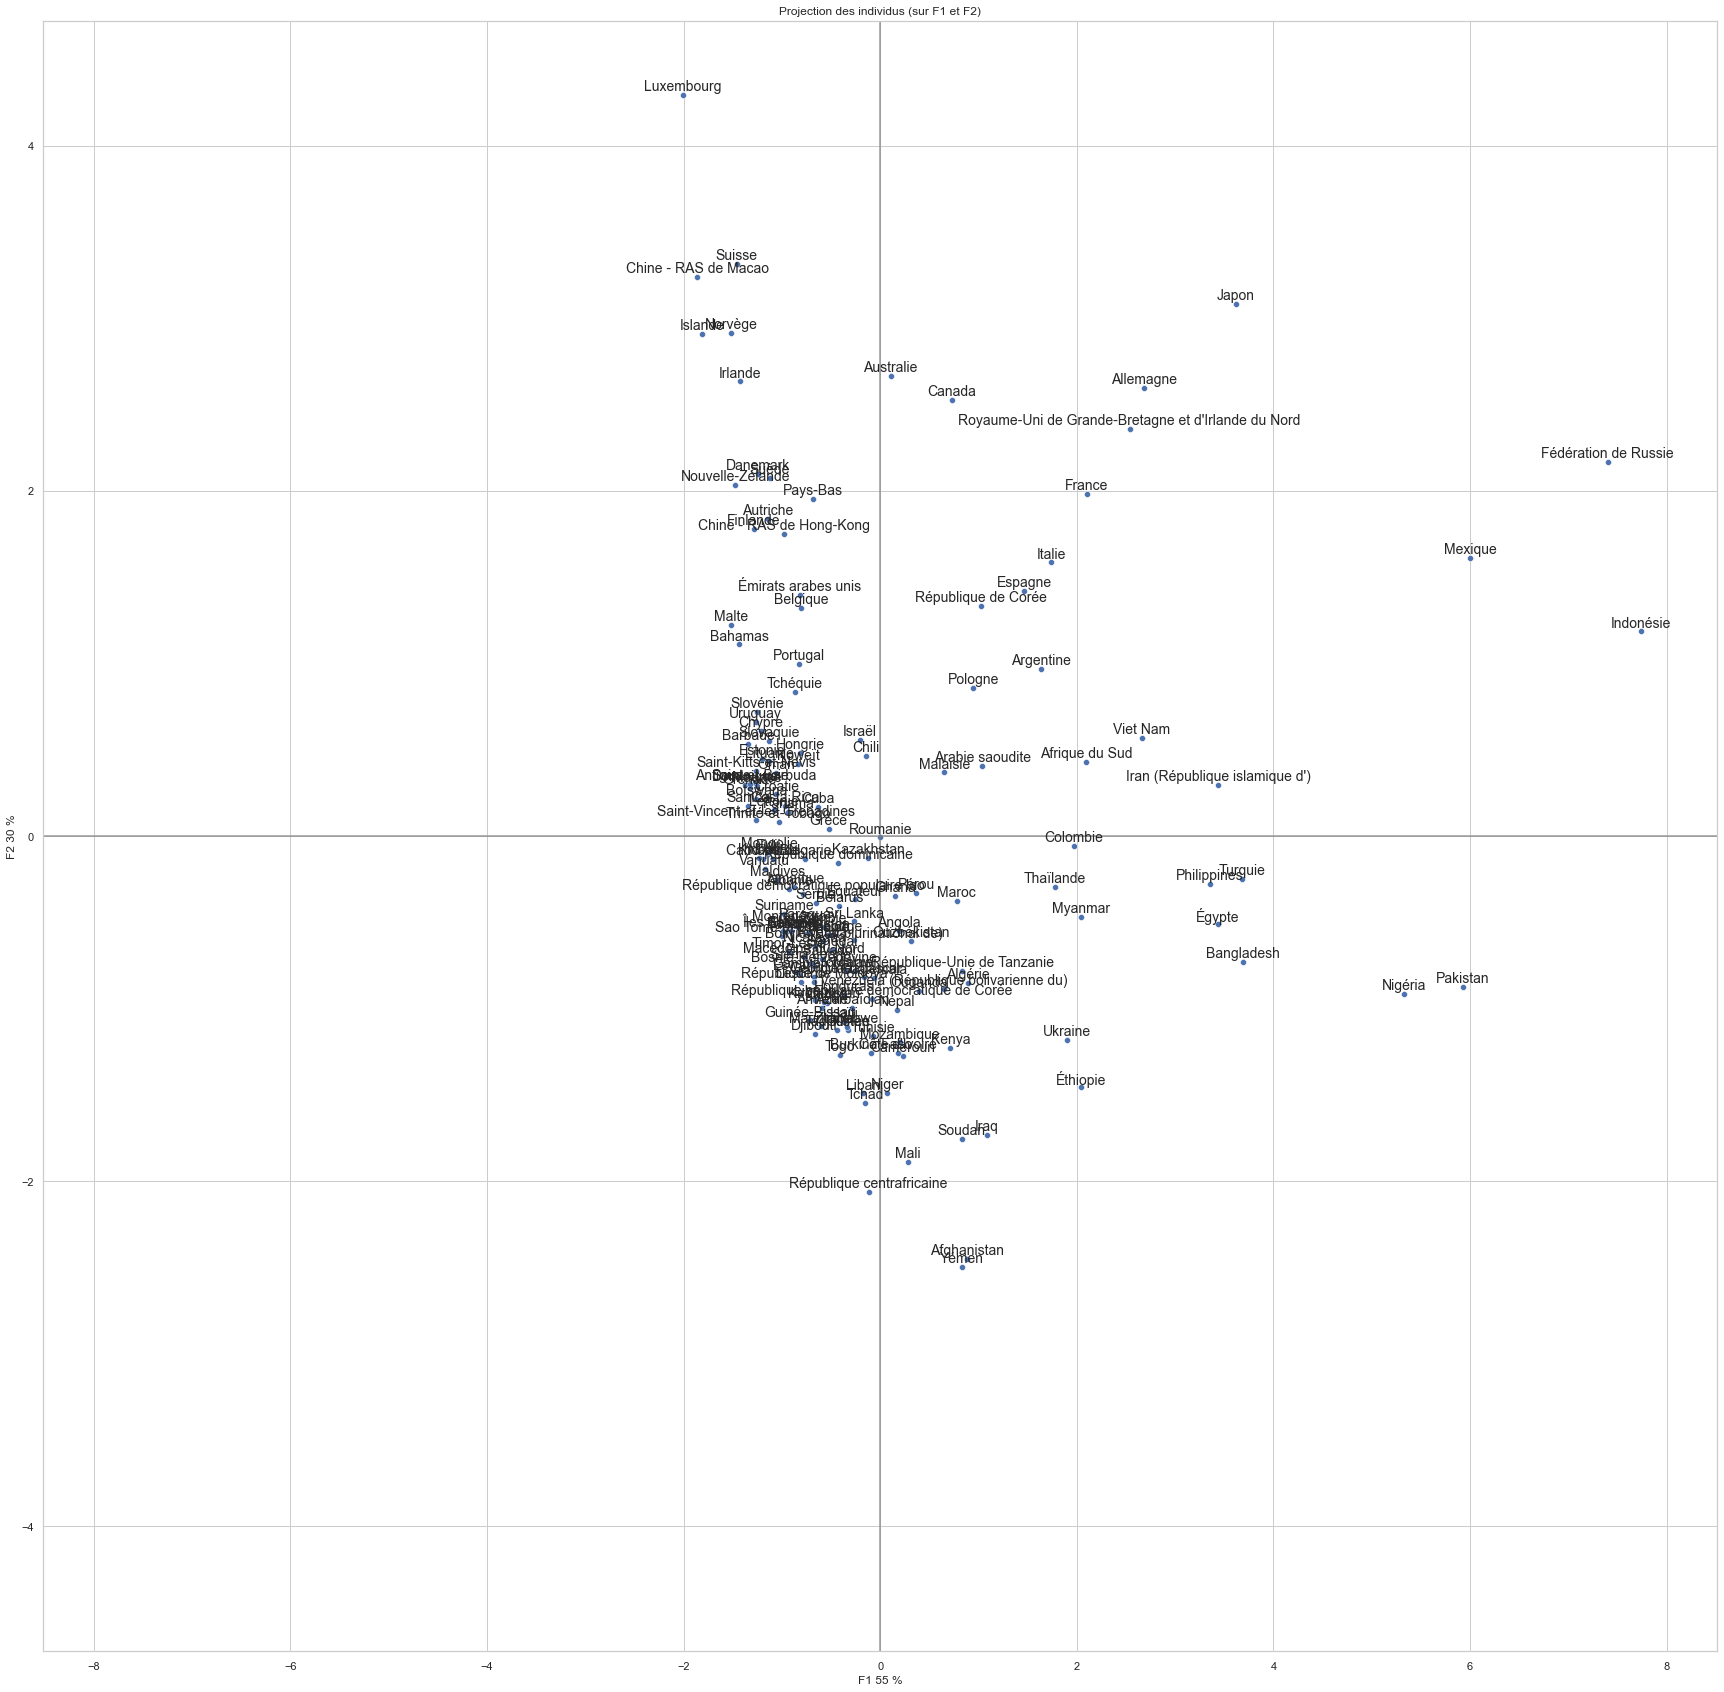

In [256]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, marker="o",figsize=[30,30])

Cette visualisation doit être regardé avec le cercle des corrélation en mémoire. Les pays qui sont les plus à droites sont les pays avec le plus de population et le plus de dsponibilité alimentaire, a contrario  moins un pays est à droite moins la population et la disponibilité alimentaire sont importante. Pour ce qui est de l'axe F2 ont se rappelle du fait qu'on pouvait définier cet axe comme la qualité d'un pays. 
On voit que les pays situé le plus en haut sont le luxembourg, la suisse, la norvège. et les plus en bas sont : le Yemen, l''Afghanistan etc ...
Les pays les plus intéressant pour nous auraient été ceux que se situe tout en haut et tout à droite. Il n'existe pas de tels pays mais certains pays s'en rapproche, Le Japon est intérressant, en 2017 la Russie est au même niveau de qualité de vie que la France.

Et c'est une bonne idée d'avoir gardé la France dans les pays à étudier, les pays autour sont évidemment des pays à considérer ! 
On va visualiser nos points en fonctions des clusters attribués pour k=8

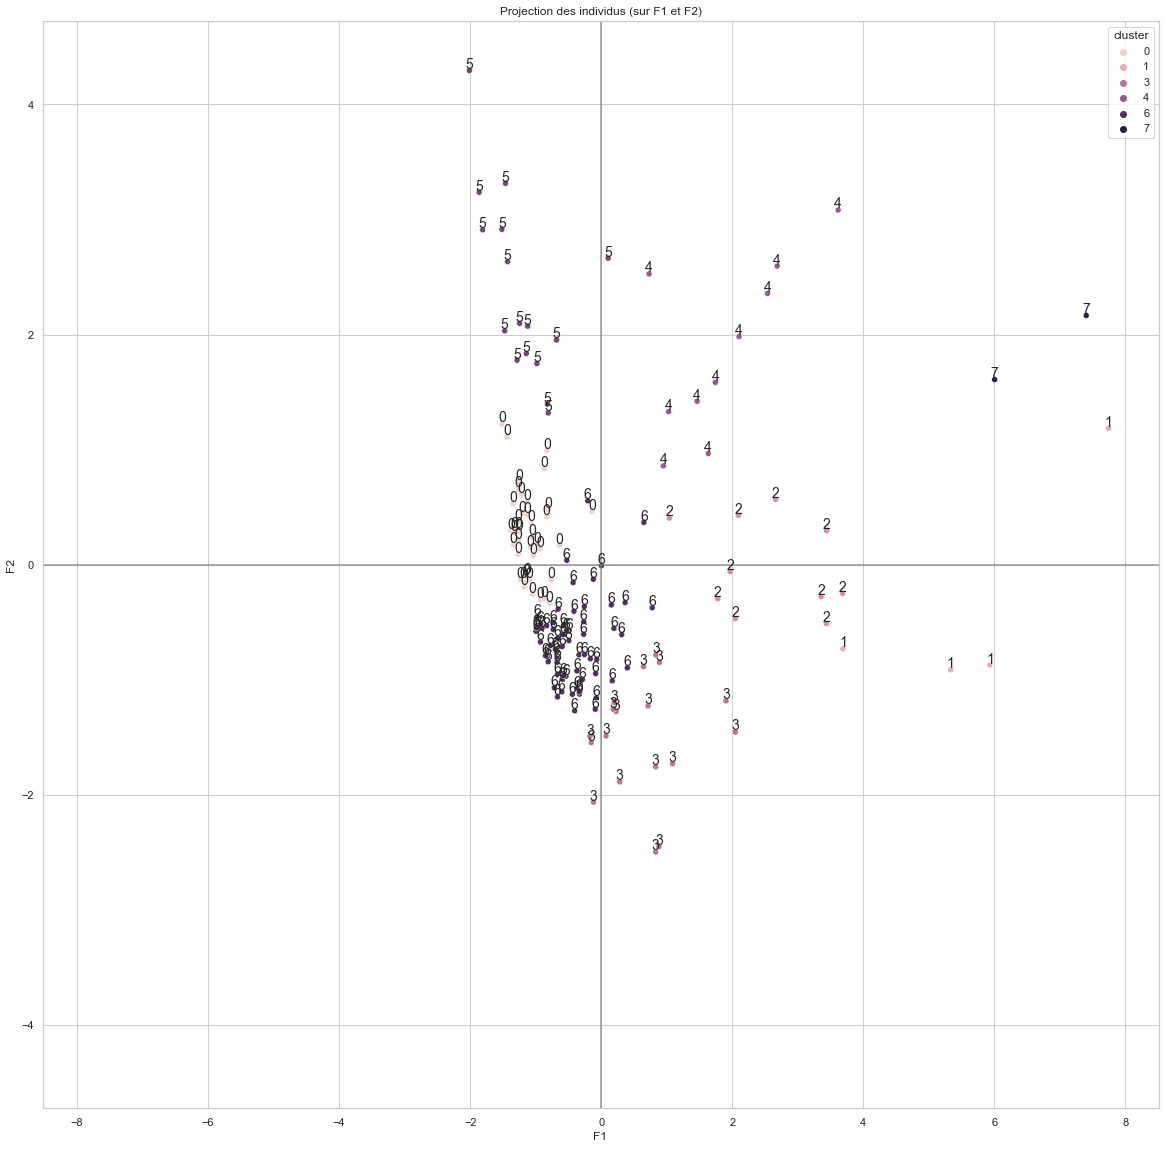

In [257]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y,clusters=df_cls8['cluster'],labels=df_cls8['cluster'],figsize=[20,20])

On voit ici notre clustering pour k=8 mais grace à la représentation de reprsentation sur notre plan factoriel on peut affiner notre résultat.
Par exemple le groupe 5 est interessant, l'Australie n'est pas un marché si différent de la France en terme de quantité, quand on regarde ce plan .

# Analyse rapide des USA, de l'Inde, la Chine, et la Brésil 

In [126]:
df_subset=pd.read_csv("df_subset.csv")

In [127]:
df_subset.head()

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an)
0,Inde,1338676785.00,710583024.25,2971862.46
1,"Chine, continentale",1421021791.00,1376288025.02,17521198.68
2,États-Unis d'Amérique,325084756.00,321957440.65,18100719.21
3,Brésil,207833823.00,160133882.28,9982258.52


On supplémente notre subset de nos colonne PIB et Stabilité politique

In [128]:
pib=pd.read_csv("pibhab.csv")

In [129]:
df_subset= pd.merge(df_subset, pib, on='Zone', how='left')

In [130]:
stabilite_politique= pd.read_csv("stabilite_politique.csv")

In [131]:
df_subset= pd.merge(df_subset, stabilite_politique, on='Zone', how='left')

In [132]:
df_subset

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability
0,Inde,1338676785.00,710583024.25,2971862.46,1960.39,-0.76
1,"Chine, continentale",1421021791.00,1376288025.02,17521198.68,8663.13,-0.23
2,États-Unis d'Amérique,325084756.00,321957440.65,18100719.21,59921.67,0.34
3,Brésil,207833823.00,160133882.28,9982258.52,9928.68,-0.42


On voit très vite que les P.I.B par Habitant sont (relativement) bas pour ces pays à l'exception des USA. La Chine quand a elle a une stabilité politique certes plus faible que les USA mais sont P.I.B par hab est très proche du brésil qui est respectable. L'Inde est le pays avec le moins de stabilité politique les plus petites disponibilités alimentaires ( relativement aux trois autres) et même si sa population est élevé elle est relativement pauvre, on l'exclue de nos recommandation
Pour ce qui est de la Chine et du Brésil je recommande ces pays, certes pas avec la même force que les USA, mais on ne peut pas ignorer des pays avec un marché alimentaire de la viande de volaille aussi grand ( 18 MILLIONS DE TO PAR ANNEE et 10 MILLIONS DE TO par année respectivemment)

Je recommande les pays du groupe 4 qui sont les même que ceux du groupe 1 de la CAH, j' ajouterais aussi les USA, la Chine et le Brésil, et l'Autralie. 